In [16]:
import pandas as pd
data = pd.read_csv("/content/base_fusionnee.csv")
data.head()

HDI Rank               Country   1990   1995   2000   2005   2010   2011  \
0      169           Afghanistan     ..     ..     ..     ..   52.6   57.7   
1       69               Albania   39.4   47.6   63.5   70.9   76.5   81.2   
2       91               Algeria   48.4   55.2   62.9   71.3   69.9   67.5   
3      148                Angola     ..     ..  152.5  106.6  104.1    100   
4       78   Antigua and Barbuda  149.3  145.6  116.3  120.1  104.7  103.6   

    2012   2013   2014  2015  2016  2017  2018  2019  
0   60.8   55.6   49.9  49.6  43.7  45.1  49.2  45.6  
1   76.5   75.9   75.4  71.8  74.8  78.2  76.8  76.7  
2   65.4   63.6   62.1  59.7  55.9  55.9    58    52  
3   91.8   86.8   79.3  62.9  53.4  52.3  66.4    ..  
4  103.8  107.2  106.7  95.2  90.2    ..    ..    ..

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   HDI Rank  959 non-null    object
 1   Country   959 non-null    object
 2   1990      959 non-null    object
 3   1995      959 non-null    object
 4   2000      959 non-null    object
 5   2005      959 non-null    object
 6   2010      959 non-null    object
 7   2011      959 non-null    object
 8   2012      959 non-null    object
 9   2013      959 non-null    object
 10  2014      960 non-null    object
 11  2015      960 non-null    object
 12  2016      960 non-null    object
 13  2017      960 non-null    object
 14  2018      960 non-null    object
 15  2019      767 non-null    object
dtypes: object(16)
memory usage: 120.1+ KB


In [18]:
data.describe()

HDI Rank       Country 1990 1995 2000 2005 2010 2011 2012 2013 2014  \
count       959           959  959  959  959  959  959  959  959  959  960   
unique      155           193  351  420  464  499  519  522  516  515  515   
top          74   Afghanistan   ..   ..   ..   ..   ..   ..   ..   ..   ..   
freq         20             5  375  254  211  156  118  119  122  123  118   

       2015 2016 2017 2018 2019  
count   960  960  960  960  767  
unique  508  511  500  501  391  
top      ..   ..   ..   ..   ..  
freq    125  132  137  150  262

In [19]:
print("les dimensions de dataset sont (nombre de ligne nombre de colonne)=",data.shape)

les dimensions de dataset sont (nombre de ligne nombre de colonne)= (960, 16)


In [20]:
data.describe(include='object')

HDI Rank       Country 1990 1995 2000 2005 2010 2011 2012 2013 2014  \
count       959           959  959  959  959  959  959  959  959  959  960   
unique      155           193  351  420  464  499  519  522  516  515  515   
top          74   Afghanistan   ..   ..   ..   ..   ..   ..   ..   ..   ..   
freq         20             5  375  254  211  156  118  119  122  123  118   

       2015 2016 2017 2018 2019  
count   960  960  960  960  767  
unique  508  511  500  501  391  
top      ..   ..   ..   ..   ..  
freq    125  132  137  150  262

HDI Rank      1
Country       1
1990          1
1995          1
2000          1
2005          1
2010          1
2011          1
2012          1
2013          1
2014          0
2015          0
2016          0
2017          0
2018          0
2019        193
dtype: int64


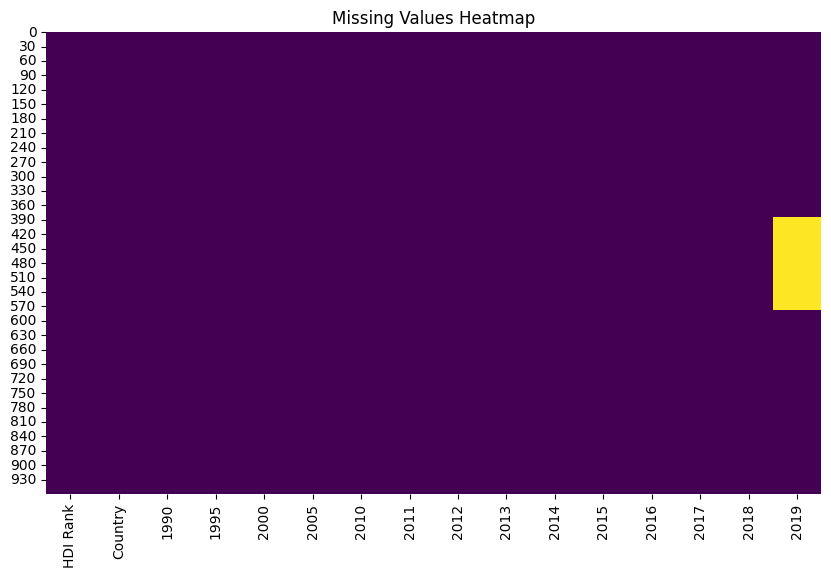

In [21]:
!pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns
# Checking for missing values
missing_values = data.isnull().sum()
print(missing_values)
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [49]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
data['Country'].fillna('Unknown', inplace=True)
# Liste des colonnes à convertir
columns_to_fill = ['HDI Rank','1990', '1995', '2000', '2005', '2010', '2011', '2012', '2013', '2014','2015','2016','2017','2018']
label_encoder = LabelEncoder()
for col in columns_to_fill:
    if data[col].dtype == 'object' or data[col].isnull().any():
# Remplir temporairement les NaN avec une valeur pour encoder
        data[col] = data[col].fillna('Missing')
        data[col] = label_encoder.fit_transform(data[col])

# Remplir les valeurs manquantes avec la moyenne des colonnes numériques
data[columns_to_fill] = data[columns_to_fill].fillna(data[columns_to_fill].mean())

# Affichage du DataFrame final
print(data)


     HDI Rank               Country  1990  1995  2000  2005  2010  2011  2012  \
0          70           Afghanistan    34    50    64    71   398   412   422   
1         131               Albania   227   301   383   436   456   478   458   
2         148               Algeria   256   324   382   437   432   439   430   
3          49                Angola    34    50   201   164   177   172   507   
4         137   Antigua and Barbuda   142   169   162   184   178   179   174   
..        ...                   ...   ...   ...   ...   ...   ...   ...   ...   
955       112     Brunei Darussalam    34    50    64    71    83    84    79   
956       133                  Cuba    34    50    64    71    83    84    79   
957        88         Liechtenstein    34    50    64    71    83    84    79   
958        11             Singapore    34    50    64    71    83    84    79   
959        85                  Chad    34    50    64    71    83    84    79   

     2013  2014  2015  2016

<ipython-input-49-550da37ad30f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Country'].fillna('Unknown', inplace=True)


# ***Analyse Univarié***

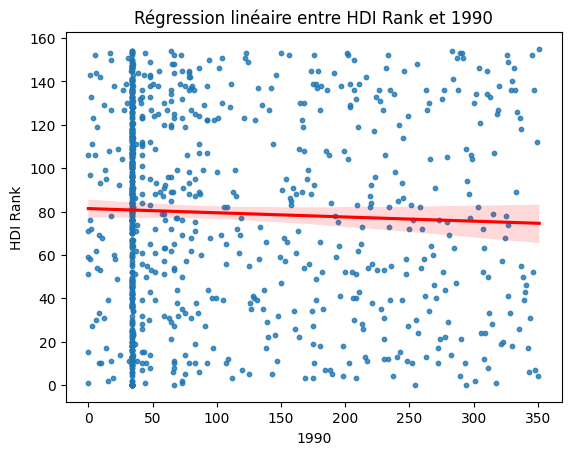

In [60]:
#RegPlot entre 'HDI Rank' et '1990'
sns.regplot(x='1990', y='HDI Rank', data=data, scatter_kws={'s':10}, line_kws={"color": "red"})
plt.title('Régression linéaire entre HDI Rank et 1990')
plt.xlabel('1990')
plt.ylabel('HDI Rank')
plt.show()


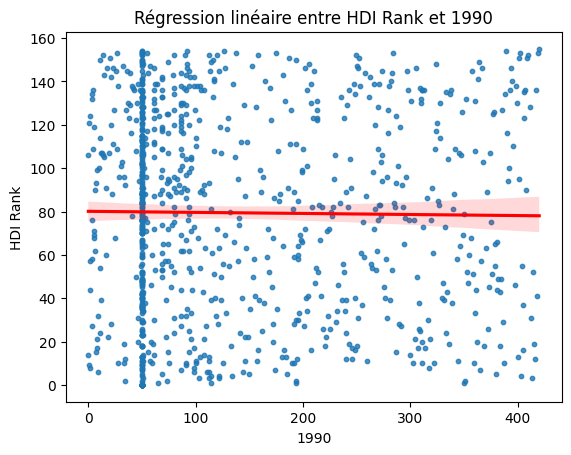

In [61]:
#RegPlot entre 'HDI Rank' et '1995'
sns.regplot(x='1995', y='HDI Rank', data=data, scatter_kws={'s':10}, line_kws={"color": "red"})
plt.title('Régression linéaire entre HDI Rank et 1990')
plt.xlabel('1990')
plt.ylabel('HDI Rank')
plt.show()

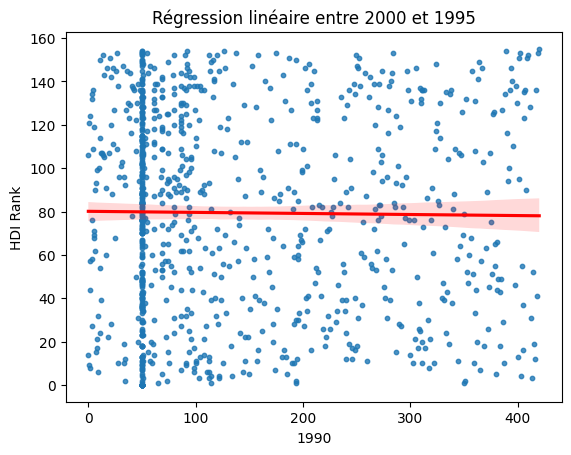

In [63]:
#RegPlot entre '2000' et '1995'
sns.regplot(x='1995', y='HDI Rank', data=data, scatter_kws={'s':10}, line_kws={"color": "red"})
plt.title('Régression linéaire entre 2000 et 1995')
plt.xlabel('1990')
plt.ylabel('HDI Rank')
plt.show()

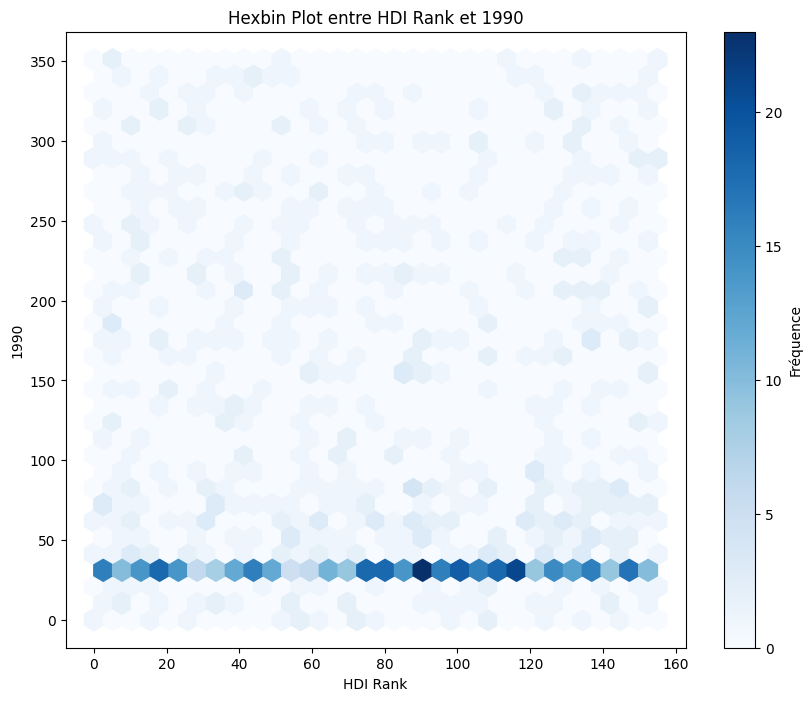

In [64]:
# Exemple : Hexbin Plot entre 'HDI Rank' et '1990'
plt.figure(figsize=(10, 8))
plt.hexbin(data['HDI Rank'], data['1990'], gridsize=30, cmap='Blues')
plt.colorbar(label='Fréquence')
plt.title('Hexbin Plot entre HDI Rank et 1990')
plt.xlabel('HDI Rank')
plt.ylabel('1990')
plt.show()

# ***Analyse bivarié***

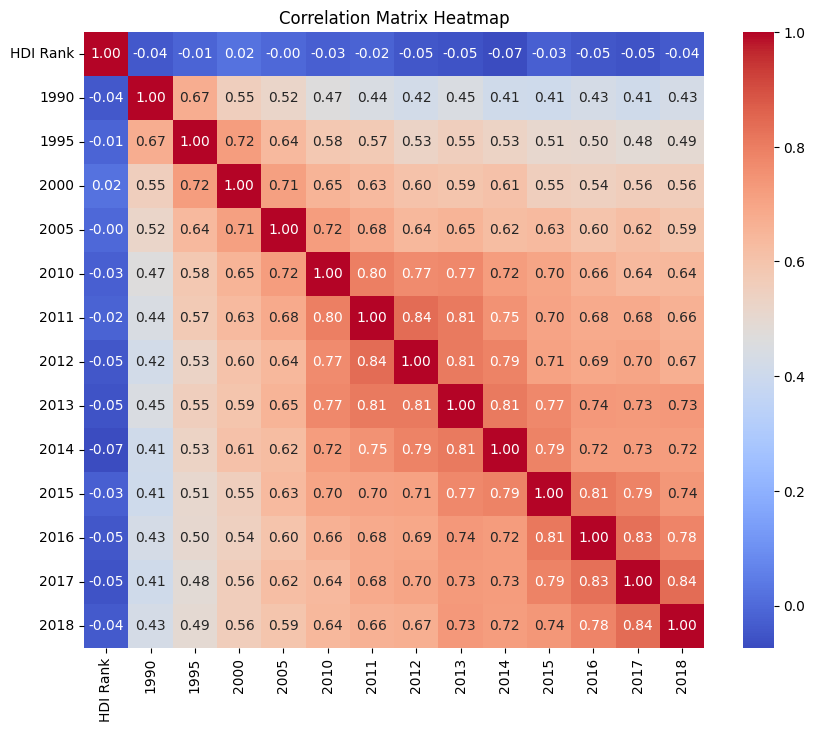

In [50]:
selected_columns = ['HDI Rank','1990', '1995', '2000', '2005', '2010', '2011', '2012', '2013', '2014','2015','2016','2017','2018']
# Calculate the correlation matrix
correlation_matrix = data[selected_columns].corr() #This line is added to calculate correlation

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

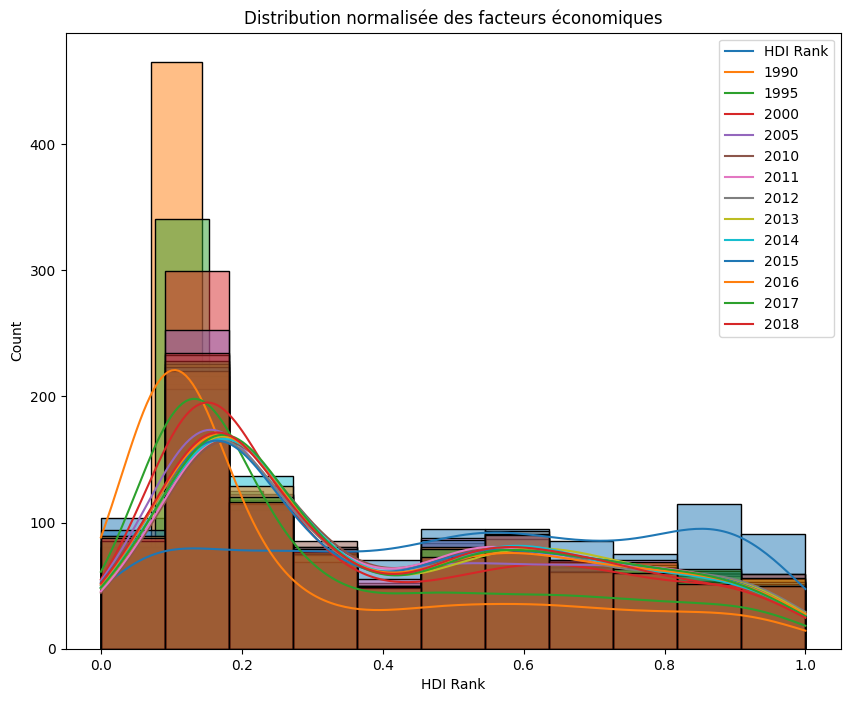

In [51]:
# Normalisation Min-Max
from sklearn.preprocessing import MinMaxScaler # Import MinMaxScaler
scaler = MinMaxScaler()
data_normalized = data.copy()
data_normalized[selected_columns] = scaler.fit_transform(data[selected_columns])

# Visualisation des distributions normalisées
plt.figure(figsize=(10, 8))
for col in selected_columns:
    sns.histplot(data_normalized[col], kde=True, label=col)
plt.title("Distribution normalisée des facteurs économiques")
plt.legend(selected_columns)
plt.show()

<Figure size 1000x800 with 0 Axes>

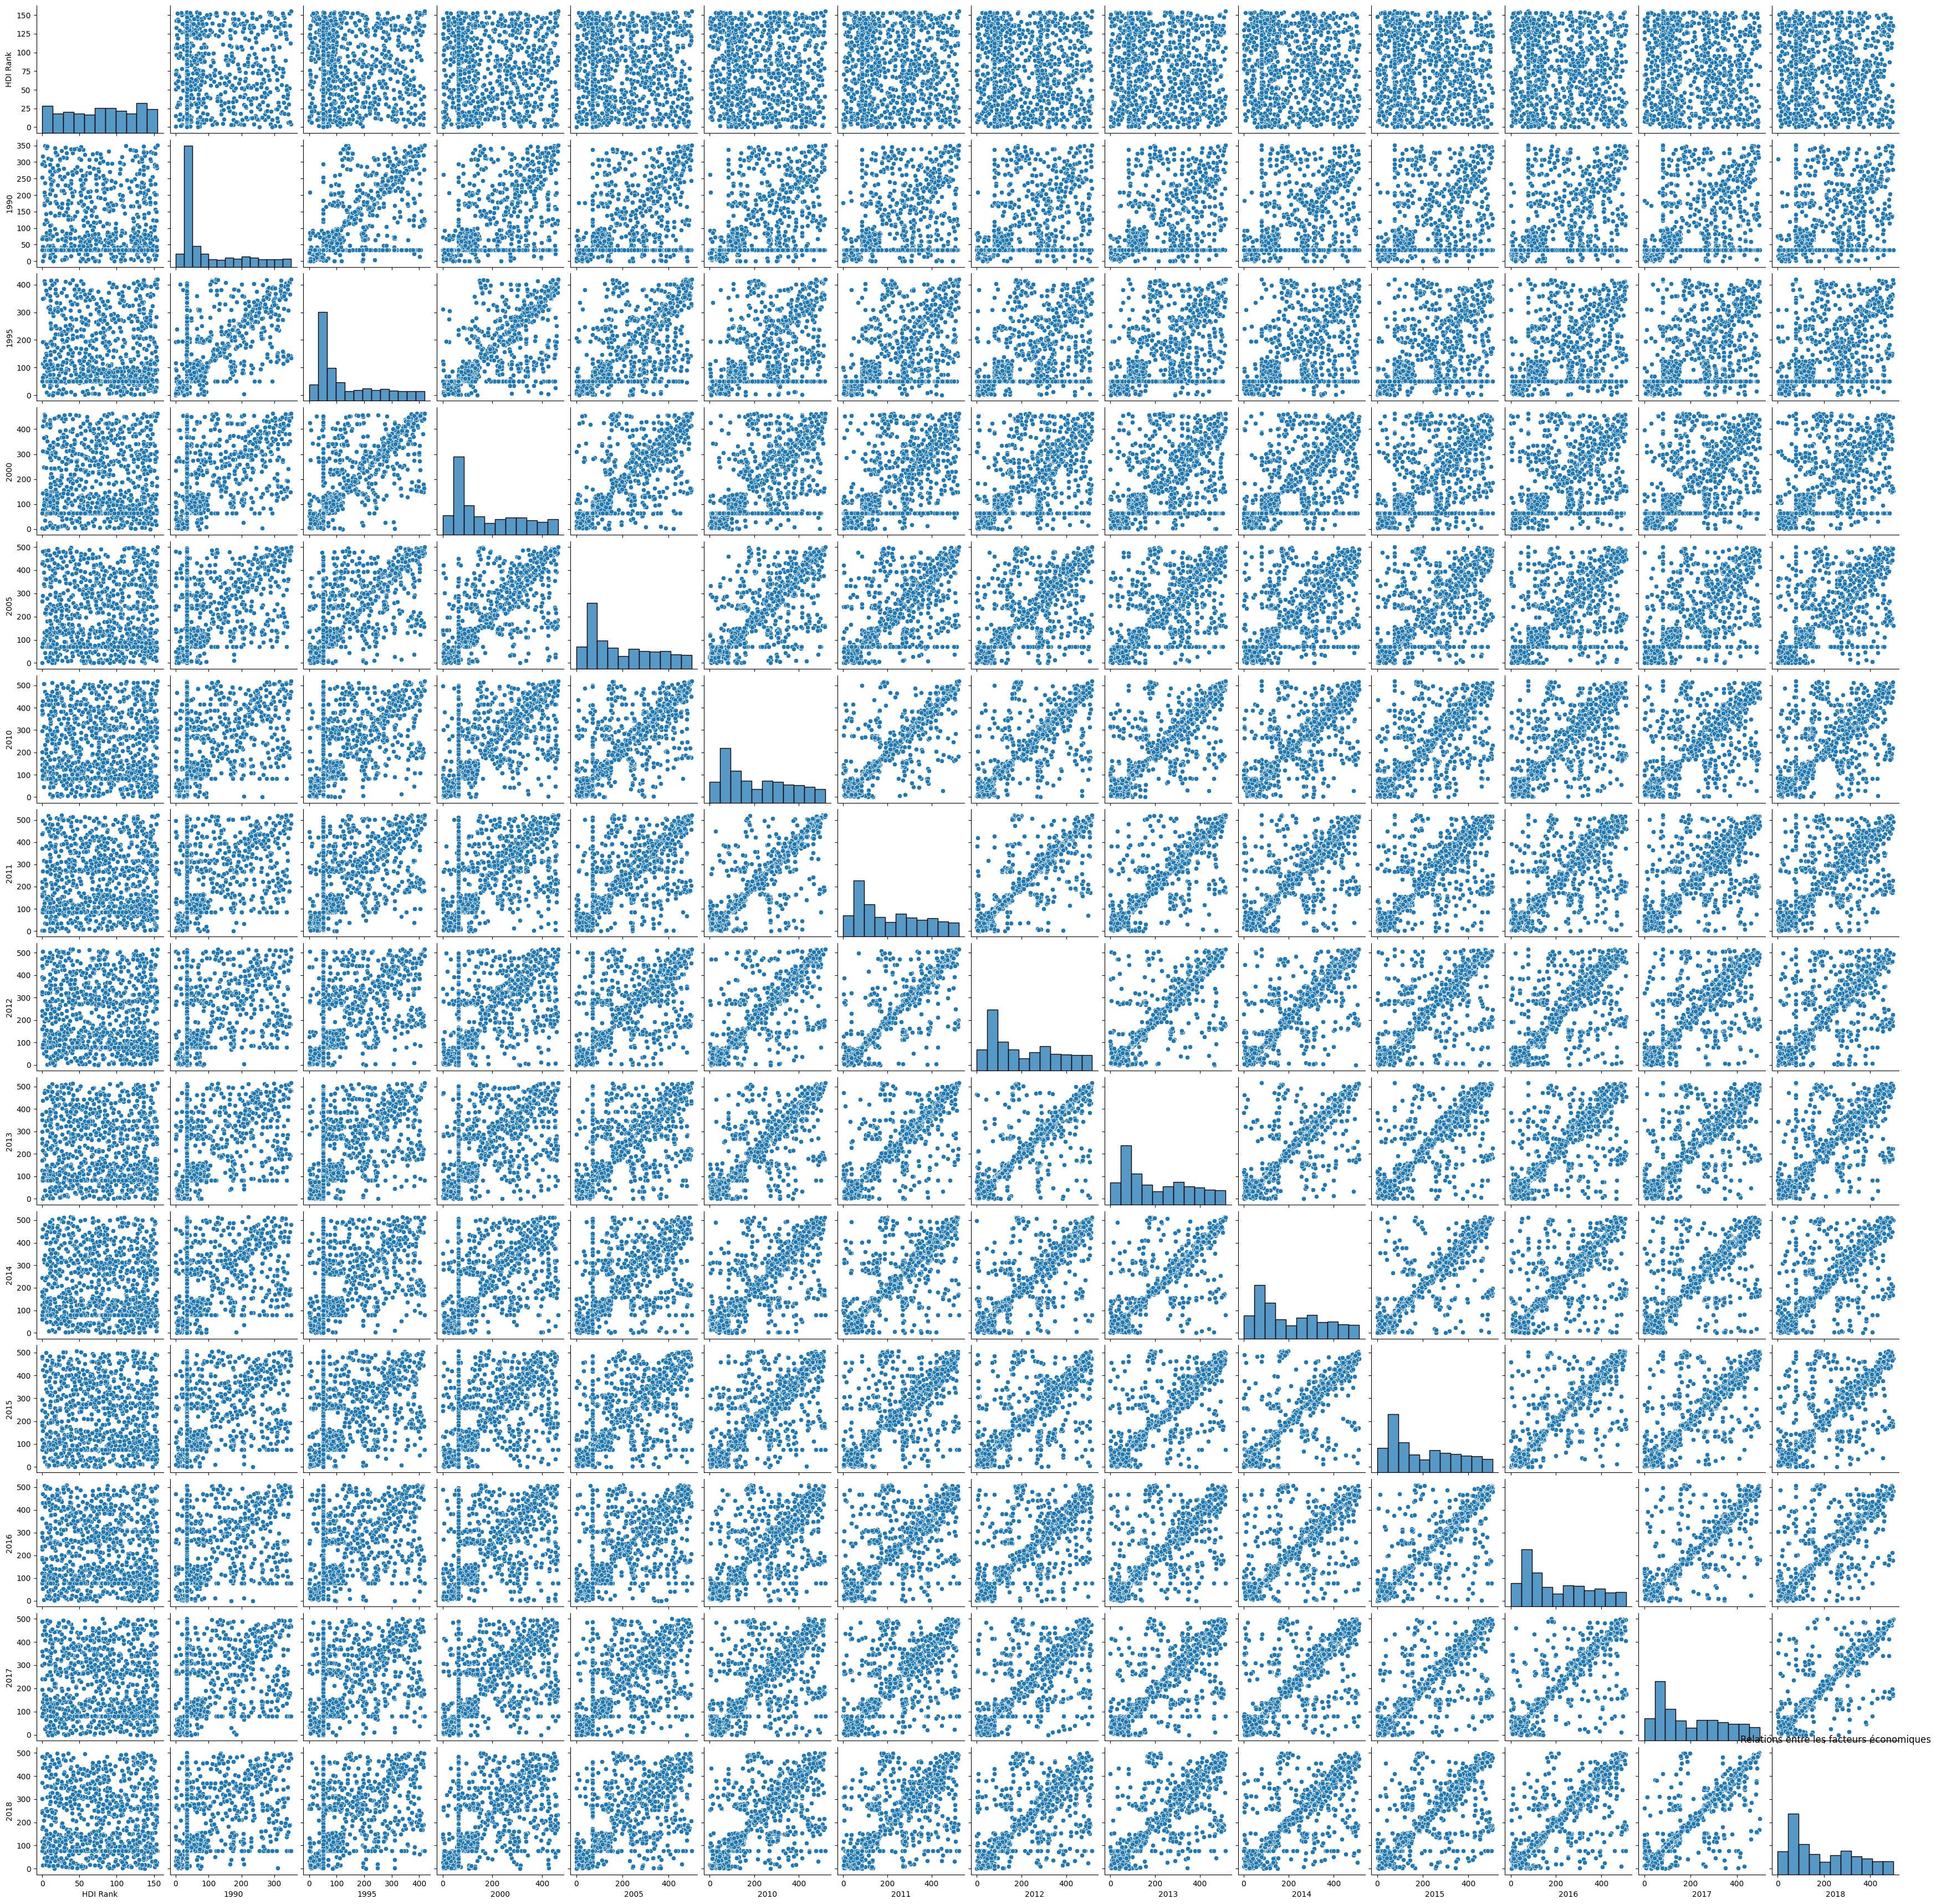

In [52]:
#Nuage de points entre HDI et le PIB
plt.figure(figsize=(10,8))
sns.pairplot(data, vars=selected_columns)
plt.title("Relations entre les facteurs économiques")
plt.show()